In [2]:
import numpy as np
import pandas as pd
import glob


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

rc = {'axes.facecolor': '#E3DCD1',
      'font.family': 'Lucida Sans Unicode',
      'grid.linestyle': '-',
      'grid.linewidth': '0.75',
      'grid.color': '#ffffff',
      'mathtext.fontset': 'stixsans',
      'mathtext.sf': 'sans',
      'legend.frameon': True}
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set(rc=rc)

pal = sns.color_palette(palette='colorblind', n_colors=8)
colorlist = pal.as_hex()

import seaborn as sns
# sns.set(style="whitegrid")

/Users/nathanb/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Outline for notebook

Here I'm going to consider the protein coverage on the cell membrane of E. coli. We can use the work from Taheri-Araghi to estimate cell volume, and surface area from  Ojkic et al. eLife 2019 (https://elifesciences.org/articles/47033). They note that the surface area follows S = 2pi V ^(2/3), where S is surface area, V is volume.  From Taheri-Araghi et al. , volume in um^3 can be calculated from a fit of their data against growth rate (hr^-1) using volume = 0.27 * 2^(1.10*x).


## Load in data

In [4]:
# Load the data set with annotated GO function. 
data = pd.read_csv('../../../data/compiled_absolute_go_terms.csv')

# Group by data set and growth condition to find similar rates. 
data.head()

,annotation,cog_category,cog_class,cog_letter,condition,gene_name,growth_rate_hr,mass_da,tot_per_cell,fg_per_cell,dataset,strain,go_number,go_term,go_namespace
0,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.9,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0016021,integral component of membrane,cellular_component
1,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.9,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0008779,acyl-[acyl-carrier-protein]-phospholipid O-acy...,molecular_function
2,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.9,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0008922,long-chain fatty acid [acyl-carrier-protein] l...,molecular_function
3,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.9,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0008654,phospholipid biosynthetic process,biological_process
4,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.9,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0006631,fatty acid metabolic process,biological_process


In [5]:
membrane_prots = data[data['go_number']=='GO:0016020']

membrane_prots = membrane_prots[membrane_prots.dataset=='schmidt_2016']
membrane_prots = membrane_prots.sort_values(by='growth_rate_hr')
membrane_prots = membrane_prots[membrane_prots.growth_rate_hr >= 0]

membrane_prots.head()

,annotation,cog_category,cog_class,cog_letter,condition,gene_name,growth_rate_hr,mass_da,tot_per_cell,fg_per_cell,dataset,strain,go_number,go_term,go_namespace
8,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,lb_miller,aas,1.90,80700.0,12.0,0.058317,schmidt_2016,BW25153,GO:0016020,membrane,cellular_component
22,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,glycerol_pAA,aas,1.27,80700.0,10.0,0.048598,schmidt_2016,BW25153,GO:0016020,membrane,cellular_component
36,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,acetate,aas,0.30,80700.0,6.0,0.029159,schmidt_2016,BW25153,GO:0016020,membrane,cellular_component
50,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,fumarate,aas,0.42,80700.0,7.0,0.034018,schmidt_2016,BW25153,GO:0016020,membrane,cellular_component
64,1-acyl-sn-glycerol-3-phosphate acyltransferase,Metabolism,Lipid transport and metabolism,I,galactose,aas,0.26,80700.0,3.0,0.014579,schmidt_2016,BW25153,GO:0016020,membrane,cellular_component


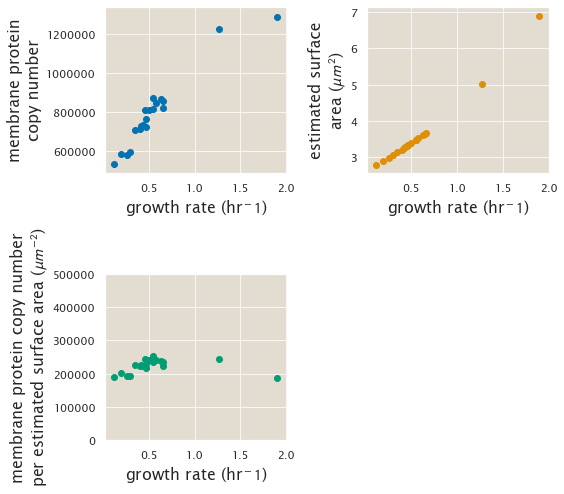

In [61]:

fig, ax = plt.subplots(2,2, figsize=(8,7))
ax = ax.ravel()

for dataset, data in membrane_prots.groupby(['condition', 'growth_rate_hr']):
    ax[0].scatter(dataset[1], data.tot_per_cell.sum(), color = colorlist[0])
ax[0].set_ylabel('membrane protein\ncopy number', fontsize=16)
    
for dataset, data in membrane_prots.groupby(['condition', 'growth_rate_hr']):
    vol = 0.27*2**(1.10*data.growth_rate_hr.unique())
    surf =  2*np.pi*(vol**(2/3))
    ax[1].scatter(dataset[1],surf, color = colorlist[1])
ax[1].set_ylabel('estimated surface\narea ($\mu m^2$)', fontsize=16)

for ax_ in ax:
    ax_.set_xlabel('growth rate (hr$^-1$)', fontsize=16)

for dataset, data in membrane_prots.groupby(['condition', 'growth_rate_hr']):
    vol = 0.27*2**(1.10*data.growth_rate_hr.unique())
    surf =  2*np.pi*(vol**(2/3))
    copy_per_area = data.tot_per_cell.sum()/surf
    ax[2].scatter(dataset[1],copy_per_area, color = colorlist[2])

ax[2].set_ylabel('membrane protein copy number\nper estimated surface area ($\mu m^{-2}$)', fontsize=16)
ax[2].set_ylim(0,500000)


ax[3].axis('off')

plt.tight_layout()

In [28]:
# I guess I'm being a bit dumb in not consider the double bilayer. In addiiton, to 
# get the fractional area occupied by protein, I need to get a better sense
# for protein size. I should probably consider number of protein complexes
# and not total protein copy number.